In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
plt.switch_backend('agg')
%matplotlib inline
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import tensorflow as tf
import numpy as np
import pandas as pd
import random as ran
import h5py


KeyboardInterrupt: 

In [2]:
f1 = h5py.File('/fred/oz016/Chayan/Autoencoder_files/2_sec_files/default_BBH_2_sec_train.hdf', 'r')

strain_1 = f1['injection_samples']['h1_strain'][()]
signal_1 = f1['injection_parameters']['h1_signal'][()]


In [31]:
def _preprocess_data(data, num, samples):
    
    """ Scales the amplitudes of training and test set signals """
    new_array = np.zeros((num,samples))

    for i in range(10):
        new_array[i][np.where(data[i]>0)] = data[i][data[i]>0]/(np.max(data, axis=1)[i])
        new_array[i][np.where(data[i]<0)] = data[i][data[i]<0]/abs(np.min(data, axis=1)[i])
        
    return new_array
    

In [1]:
def normalize_test(a):
    new_array = []
    for i in range(a.shape[0]):
        dataset = a[i]
#        dataset = dataset[1536:2048]
        maximum = np.max(dataset)
        minimum = np.abs(np.min(dataset))
        for j in range(4096):
            if(dataset[j] > 0):
                dataset[j] = dataset[j]/maximum
            else:
                dataset[j] = dataset[j]/minimum
#        dataset = dataset+gauss
        new_array.append(dataset)
    return new_array


In [32]:
import timeit

starttime = timeit.default_timer()
print("The start time is :",starttime)

h1_strain = _preprocess_data(strain_1, 10, 4096)
h1_signal = _preprocess_data(signal_1, 10, 4096)

print("The time difference is :", timeit.default_timer() - starttime)


The start time is : 2302341.820203407
The time difference is : 6.899829604662955


In [4]:
import timeit

starttime = timeit.default_timer()
print("The start time is :",starttime)

h1_strain = normalize_test(strain_1)
h1_signal = normalize_test(signal_1)

print("The time difference is :", timeit.default_timer() - starttime)


The start time is : 2302531.637964466
The time difference is : 0.12311078701168299


In [24]:
h1_strain


[array([-0.19549876, -0.13917395, -0.10325244, ..., -0.18796211,
         0.06404395,  0.05549356], dtype=float32),
 array([ 0.10377654, -0.07893462,  0.08179432, ..., -0.03098704,
         0.10248394, -0.23284659], dtype=float32),
 array([-0.18533902, -0.11247281,  0.04121769, ...,  0.4073772 ,
         0.35954818,  0.07518641], dtype=float32),
 array([-0.06265582,  0.40695924,  0.13644959, ..., -0.06038006,
         0.00529002, -0.11584815], dtype=float32),
 array([ 0.176266  , -0.07699689, -0.0648893 , ..., -0.01648342,
        -0.02270334,  0.12004846], dtype=float32),
 array([-0.17158881,  0.4891917 ,  0.35902384, ..., -0.11049335,
         0.02504126,  0.33213395], dtype=float32),
 array([-0.31325606, -0.33570436,  0.26509607, ...,  0.11453   ,
        -0.54479253, -0.04228161], dtype=float32),
 array([-0.53169763, -0.16887358, -0.25114018, ..., -0.34752247,
         0.39024496,  0.07759956], dtype=float32),
 array([-0.24827078, -0.07717846, -0.07996541, ...,  0.32806537,
       

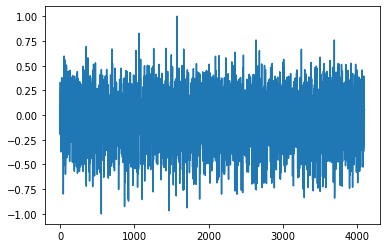

In [28]:
plt.plot(h1_strain[0])


In [13]:
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence_noisy,sequence_pure,n_steps):
    X, y = list(), list()
    for i in range(len(sequence_noisy)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence_noisy)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence_noisy[i:end_ix], sequence_pure[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# choose a number of time steps
n_steps = 4
X_test_noisy = []
X_test_pure = []

for i in range(10):
    X_noisy = h1_strain[i]
    X_pure = h1_signal[i]
    X_noisy = np.pad(X_noisy, (4, 4), 'constant', constant_values=(0, 0))
    X_pure = np.pad(X_pure, (4, 4), 'constant', constant_values=(0, 0))
    # split into samples
    X, y = split_sequence(X_noisy, X_pure, n_steps)
    X_test_noisy.append(X)
    X_test_pure.append(y)
    
X_test_noisy = np.asarray(X_test_noisy)
X_test_pure = np.asarray(X_test_pure)


In [15]:
X_test_noisy.shape

(10, 4100, 4)

In [12]:
f2 = h5py.File('/fred/oz016/Chayan/GW-Denoiser/evaluation/results_2_sec_new_1.hdf', 'r')

denoised = f2['denoised_signals'][()]
pure = f2['pure_signals'][()]


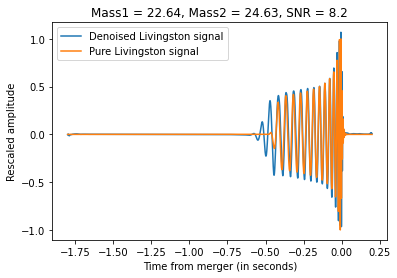

In [24]:
time = np.linspace(-1.8, 0.2, 4096)

plt.plot(time, denoised[10][0:4096], label ='Denoised Livingston signal')
plt.plot(time, pure[10][0:4096], label ='Pure Livingston signal')

plt.xlabel('Time from merger (in seconds)')
plt.ylabel('Rescaled amplitude')
plt.title('Mass1 = 22.64, Mass2 = 24.63, SNR = 8.2')
plt.legend()

#plt.savefig('2_sec_plots/Plot_5_denoised.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=200)


In [24]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

f1 = h5py.File('/fred/oz016/Chayan/Autoencoder_files/2_sec_files/default_BBH_2_sec_test.hdf', 'r')
params = f1['injection_parameters']
strain = f1['injection_samples']['l1_strain'][305]
pure = f1['injection_parameters']['l1_signal'][305]


In [25]:
f2 = h5py.File('/fred/oz016/Chayan/GW-Denoiser/evaluation/results_2_sec_new_1.hdf', 'r')

denoised = f2['denoised_signals'][305][0:4096]
pure_scaled = f2['pure_signals'][305][0:4096]


In [26]:
strain = np.float32(strain)
pure = np.float32(pure)
pure = pure


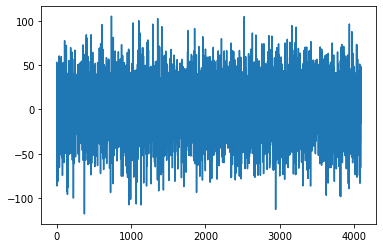

In [27]:
plt.plot(strain)


In [28]:
strain = strain[None,:]
strain = normalize_test(strain)

#pure = pure[None,:]
#pure = normalize_test(pure)


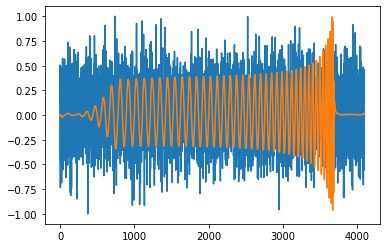

In [29]:
strain = strain[0]

plt.plot(strain)
plt.plot(denoised)


In [72]:
params['mass1'][0]

91.77255447107053

In [73]:
params['mass2'][0]

33.21744771477228

In [74]:
params['l1_snr'][0]*params['scale_factor'][0]


7.441938911199269

Text(0.5, 0, 'Time from merger at Hanford (in seconds)')

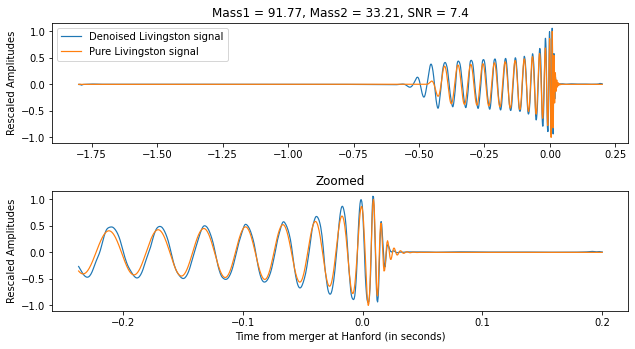

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
time = np.linspace(-1.8, 0.2, 4096)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

signal_axes = fig.add_subplot(211)
signal_axes.set_title('Mass1 = 91.77, Mass2 = 33.21, SNR = 7.4')
signal_axes.plot(time,np.squeeze(denoised), linewidth=1.2, label ='Denoised Livingston signal')
signal_axes.plot(time,pure_scaled, linewidth=1.2, label ='Pure Livingston signal')
signal_axes.set_ylabel('Rescaled Amplitudes')
signal_axes.legend()

zoomed_axes = fig.add_subplot(212)
zoomed_axes.set_title('Zoomed')
#zoomed_axes.set_autoscaley_on(False)
zoomed_axes.plot(time[3200:4096], np.squeeze(denoised)[3200:4096], linewidth=1.2)
zoomed_axes.plot(time[3200:4096], pure_scaled[3200:4096], linewidth=1.2)
zoomed_axes.set_ylabel('Rescaled Amplitudes')
zoomed_axes.set_xlabel('Time from merger at Hanford (in seconds)')

#plt.savefig('2_sec_plots/Plot_4_denoised_new.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=200)


/fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


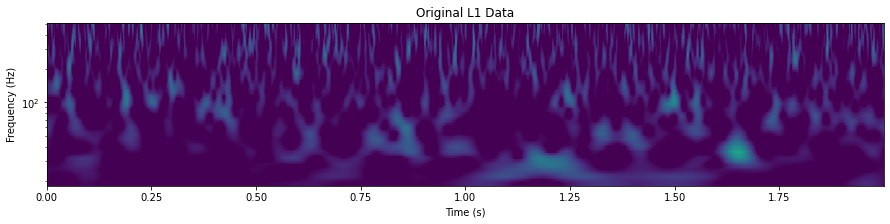

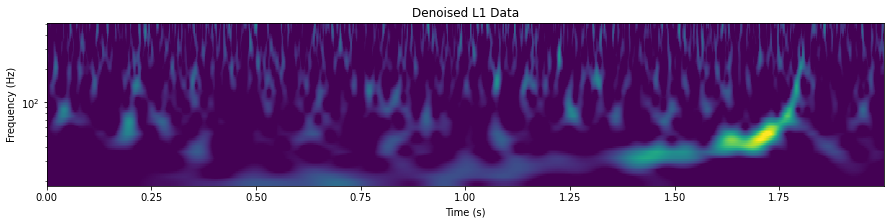

In [30]:
import pylab
from pycbc.types import TimeSeries

strain_l1 = TimeSeries(strain, delta_t=1/2048.0)
denoised_l1 = TimeSeries(np.squeeze(denoised)+ np.random.normal(0,1,4096), delta_t=1/2048.0)

for data, title in [(strain_l1, 'Original L1 Data'),
                    (denoised_l1, 'Denoised L1 Data')]:

    if(title == 'Original L1 Data'):
        t, f, p = data.qtransform(.001,logfsteps=100,qrange=(8, 8),frange=(18, 512))
        
    elif(title == 'Denoised L1 Data'):
        t, f, p = data.qtransform(.001,logfsteps=100,qrange=(8, 8),frange=(18, 512))
    
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
#    pylab.xlim(merger.time - 2, merger.time + 1)
    pylab.show()
#    plt.savefig('2_sec_plots/Q_transform_4.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=50)
    

In [272]:
f2 = h5py.File('/fred/oz016/Chayan/GW-Denoiser/evaluation/results_2_sec_new_1.hdf', 'r')

denoised = f2['denoised_signals'][0:50,0:4096,:]
pure_scaled = f2['pure_signals'][0:50,0:4096,:]


In [273]:
denoised = np.squeeze(denoised)
pure_scaled = np.squeeze(pure_scaled)


In [274]:
f1 = h5py.File('/fred/oz016/Chayan/Autoencoder_files/2_sec_files/default_BBH_2_sec_test.hdf', 'r')
strain = f1['injection_samples']['l1_strain'][0:50]

strain = normalize_test(strain)


In [275]:
strain = np.array(strain)


In [276]:
f1.close()
f2.close()


In [278]:
f1 = h5py.File('2_sec_plots/Test_files_results.hdf', 'w')
f1.create_dataset('strain_data', data=strain)
f1.create_dataset('pure_signals', data=pure_scaled)
f1.create_dataset('denoised_signals', data=denoised)


<HDF5 dataset "denoised_signals": shape (50, 4096), type "<f4">

In [279]:
f1 = h5py.File('2_sec_plots/Test_files_results.hdf', 'r')
strain = f1['strain_data'][()]
pure_scaled = f1['pure_signals'][()]
denoised = f1['denoised_signals'][()]


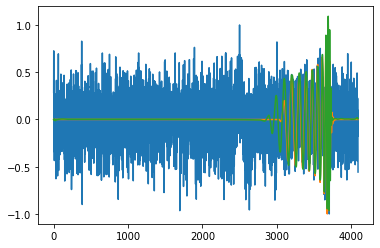

In [280]:
plt.plot(strain[0])
plt.plot(pure_scaled[0])
plt.plot(denoised[0])


In [281]:
f1.close()


/fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


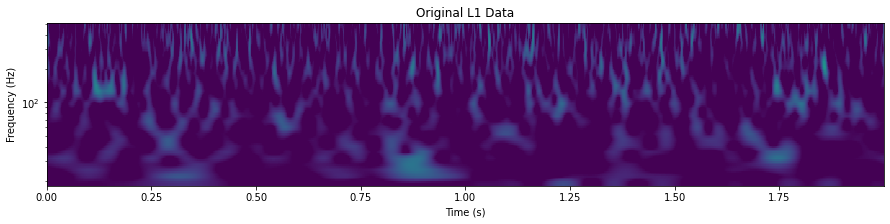

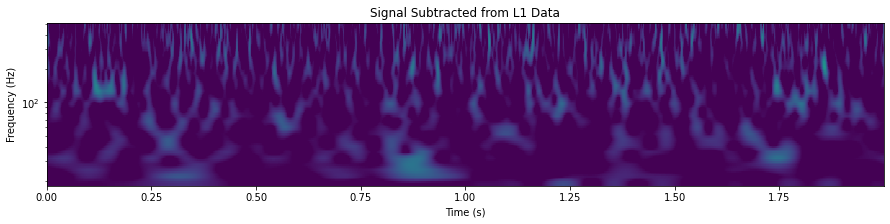

In [29]:
import pylab

#subtracted = strain[0] - np.squeeze(pure[7][0:4096])

from pycbc.types import TimeSeries

#subtracted = TimeSeries(subtracted, delta_t=1/2048.0)
strain_l1 = TimeSeries(strain, delta_t=1/2048.0)
pure_l1 = TimeSeries(pure, delta_t=1/2048.0)
#pure_l1 = TimeSeries(np.squeeze(pure[8][0:4096]), delta_t=1/2048.0)

subtracted = strain_l1 - pure_l1

# Plot the original data and the subtracted signal data

for data, title in [(strain_l1, 'Original L1 Data'),
                    (subtracted, 'Signal Subtracted from L1 Data')]:

    if(title == 'Original L1 Data'):
        t, f, p = data.qtransform(.001,logfsteps=100,qrange=(8, 8),frange=(18, 512))
        
    elif(title == 'Signal Subtracted from L1 Data'):
        t, f, p = data.qtransform(.001,logfsteps=100,qrange=(8, 8),frange=(18, 512))
    
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
#    pylab.xlim(merger.time - 2, merger.time + 1)
    pylab.show()


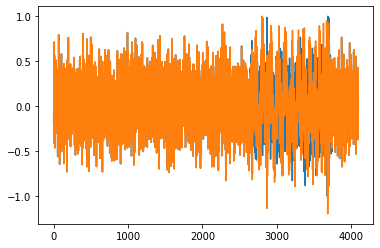

In [129]:
plt.plot(strain[0])
plt.plot(strain[0] - np.squeeze(pure[7][0:4096]))


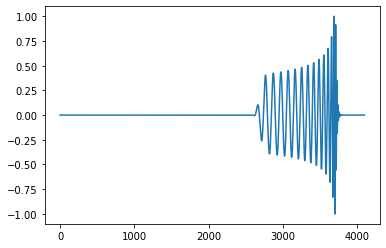

In [133]:
plt.plot(np.squeeze(pure[7][0:4096]))


In [153]:
params['mass1'][105]


22.647537077409815

In [154]:
params['mass2'][105]


24.629655825670746

In [152]:
params['l1_snr'][105]*params['scale_factor'][105]


9.236671753667219

In [52]:
f1.close()
f2.close()


In [5]:
np.where((params['mass1'][()] > 20.0) & (params['mass1'][()] < 40.0) & (params['mass2'][()] > 20.0) & (params['mass2'][()] < 40.0))


(array([  8,  38,  70,  75,  77,  89, 105, 111, 114, 115, 136, 144, 146,
        148, 151, 160, 167, 168, 177, 200, 212, 305, 312, 341, 393, 463,
        464, 471, 504, 512, 528, 545, 573, 672, 747, 782, 857, 886, 911,
        945, 954, 967, 970, 984, 985]),)

In [39]:
import h5py
import numpy as np

f1 = h5py.File('/fred/oz016/Chayan/Autoencoder_files/2_sec_files/default_BBH_2_sec_test.hdf', 'r')
strain = f1['injection_samples']['l1_strain'][()]
#strain = normalize_test(strain)

signal = f1['injection_parameters']['l1_signal'][()]
#signal = normalize_test(signal)


In [47]:
strain = normalize_test(strain)
signal = normalize_test(signal)


In [48]:
strain = np.array(strain)

In [49]:
signal = np.array(signal)

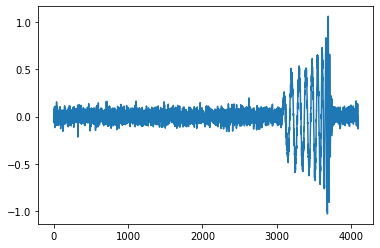

In [55]:
from matplotlib import pyplot as plt

plt.plot(signal[0]+ np.random.normal(0,0.05,4096))


/fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


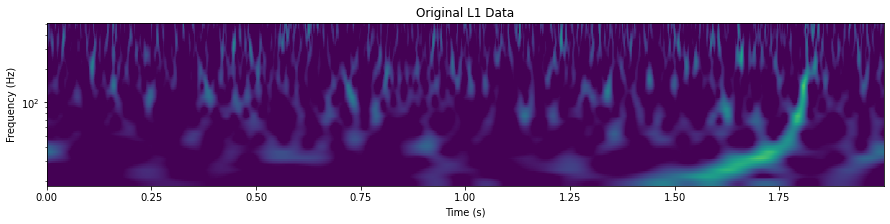

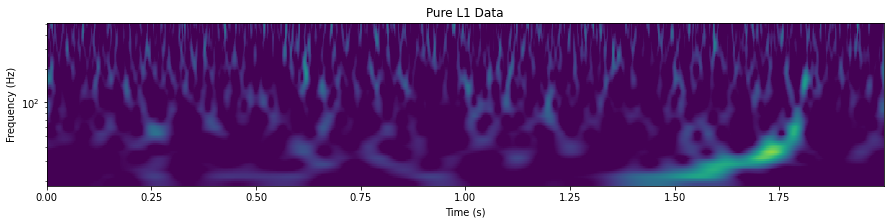

In [65]:
import pylab

from pycbc.types import TimeSeries

strain_l1 = TimeSeries(strain[3], delta_t=1/2048.0)
denoised_l1 = TimeSeries(signal[3] + np.random.normal(0,1,4096), delta_t=1/2048.0)

for data, title in [(strain_l1, 'Original L1 Data'),
                    (denoised_l1, 'Pure L1 Data')]:

    if(title == 'Original L1 Data'):
        t, f, p = data.qtransform(.001,logfsteps=100,qrange=(8, 8),frange=(18, 512))
        
    elif(title == 'Pure L1 Data'):
        t, f, p = data.qtransform(.001,logfsteps=100,qrange=(8, 8),frange=(18, 512))
    
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
#    pylab.xlim(merger.time - 2, merger.time + 1)
    pylab.show()
#    plt.savefig('2_sec_plots/Q_transform_4.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=50)
    

In [18]:
import h5py

f1 = h5py.File('/fred/oz016/Chayan/Autoencoder_files/2_sec_files/default_BBH_2_sec_25-25_SNR-4_test.hdf', 'r')

strain_1 = f1['injection_samples']['h1_strain'][()]
signal_1 = f1['injection_parameters']['h1_signal'][()]


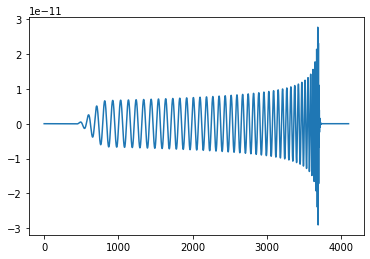

In [19]:
from matplotlib import pyplot as plt

plt.plot(signal_1[0])


In [20]:
f1['injection_parameters']['h1_snr'][()]*f1['injection_parameters']['scale_factor'][()]


array([4.08511062])

In [21]:
f1['injection_parameters']['mass2'][()]

array([25.00061717])

In [22]:
f1.close()
